# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luquillo
Processing Record 2 of Set 1 | warqla
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | peniche
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | sopo
Processing Record 12 of Set 1 | maghama
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | grenfell
Processing Record 18 of Set 1 | ayagoz
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | moron
Processing Reco

Processing Record 34 of Set 4 | tiksi
Processing Record 35 of Set 4 | dombas
Processing Record 36 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 4 | casteldaccia
Processing Record 38 of Set 4 | kuopio
Processing Record 39 of Set 4 | zhigansk
Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | abu zabad
Processing Record 42 of Set 4 | bokspits
City not found. Skipping...
Processing Record 43 of Set 4 | nantucket
Processing Record 44 of Set 4 | simplicio mendes
Processing Record 45 of Set 4 | nakapiripirit
Processing Record 46 of Set 4 | awjilah
Processing Record 47 of Set 4 | marabba
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | chiesanuova
Processing Record 0 of Set 5 | miri
Processing Record 1 of Set 5 | nanakuli
Processing Record 2 of Set 5 | kasongo-lunda
Processing Record 3 of Set 5 | caranavi
Processing Record 4 of Set 5 | baijiantan
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | kamen

Processing Record 21 of Set 8 | nova venecia
Processing Record 22 of Set 8 | moranbah
Processing Record 23 of Set 8 | maniitsoq
Processing Record 24 of Set 8 | coihaique
Processing Record 25 of Set 8 | la primavera
Processing Record 26 of Set 8 | dmitriyevka
Processing Record 27 of Set 8 | dawei
Processing Record 28 of Set 8 | agde
Processing Record 29 of Set 8 | mangaratiba
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | casablanca
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | seoul
Processing Record 34 of Set 8 | santa rosa
Processing Record 35 of Set 8 | kungurtug
Processing Record 36 of Set 8 | manuk mangkaw
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | awbari
Processing Record 40 of Set 8 | chepen
Processing Record 41 of Set 8 | balimo
City not found. Skipping...
Processing Record 42 of Set 8 | correntina
Processing Record 43 of Set 8 | mayo
Processing Record 44 of Set

Processing Record 7 of Set 12 | san pedro
Processing Record 8 of Set 12 | chaozhou
Processing Record 9 of Set 12 | polis
Processing Record 10 of Set 12 | ust-kuyga
Processing Record 11 of Set 12 | prince rupert
Processing Record 12 of Set 12 | cadiz
Processing Record 13 of Set 12 | mlonggo
Processing Record 14 of Set 12 | iquique
Processing Record 15 of Set 12 | arak
Processing Record 16 of Set 12 | banda aceh
Processing Record 17 of Set 12 | saleaula
City not found. Skipping...
Processing Record 18 of Set 12 | doha
Processing Record 19 of Set 12 | semporna
Processing Record 20 of Set 12 | tulagi
Processing Record 21 of Set 12 | boa esperanca
Processing Record 22 of Set 12 | kuytun
Processing Record 23 of Set 12 | morristown
Processing Record 24 of Set 12 | lumut
Processing Record 25 of Set 12 | manado
Processing Record 26 of Set 12 | myitkyina
Processing Record 27 of Set 12 | vilyuysk
Processing Record 28 of Set 12 | hervey bay
Processing Record 29 of Set 12 | brigantine
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luquillo,18.3725,-65.7166,27.23,78,40,3.09,PR,1681259353
1,punta arenas,-53.1500,-70.9167,4.06,56,40,6.69,CL,1681259353
2,mataura,-46.1927,168.8643,11.38,96,100,1.80,NZ,1681259354
3,padang,-0.9492,100.3543,25.03,89,78,1.19,ID,1681259334
4,ushuaia,-54.8000,-68.3000,1.81,80,75,9.26,AR,1681259355


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luquillo,18.3725,-65.7166,27.23,78,40,3.09,PR,1681259353
1,punta arenas,-53.1500,-70.9167,4.06,56,40,6.69,CL,1681259353
2,mataura,-46.1927,168.8643,11.38,96,100,1.80,NZ,1681259354
3,padang,-0.9492,100.3543,25.03,89,78,1.19,ID,1681259334
4,ushuaia,-54.8000,-68.3000,1.81,80,75,9.26,AR,1681259355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

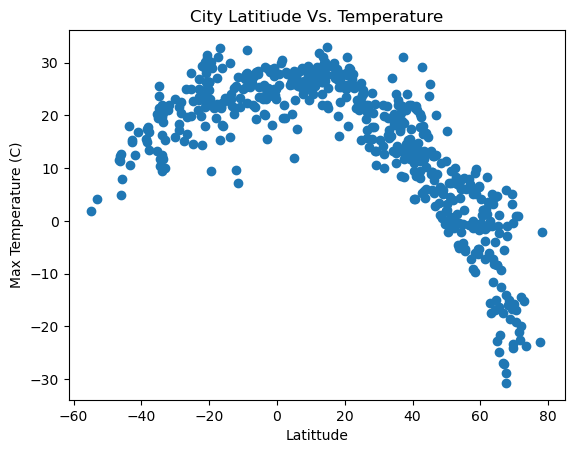

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.loc[:,"Lat"],city_data_df.loc[:,"Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latittude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitiude Vs. Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

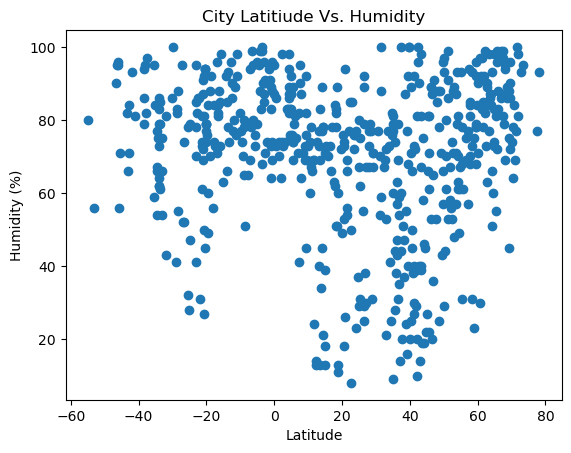

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.loc[:,"Lat"],city_data_df.loc[:,"Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitiude Vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

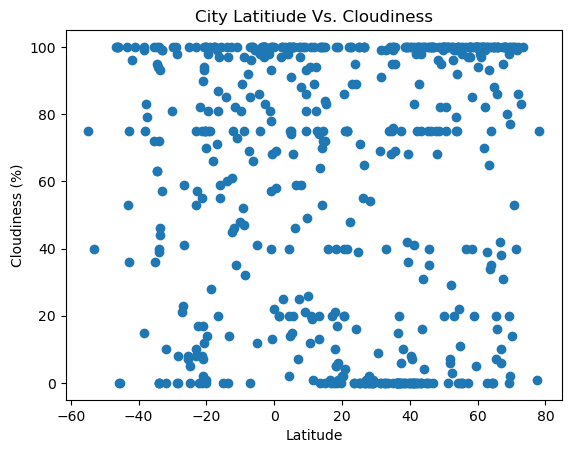

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.loc[:,"Lat"],city_data_df.loc[:,"Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitiude Vs. Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

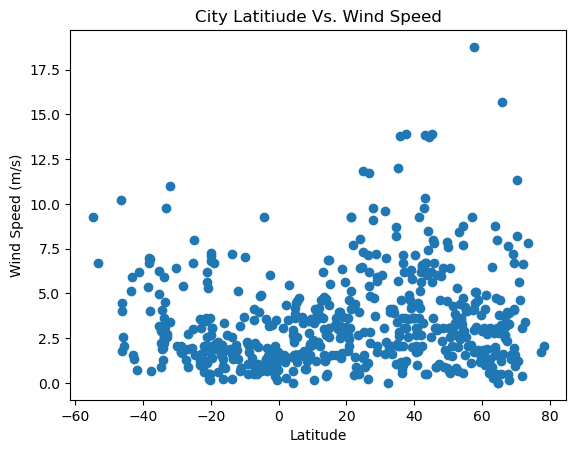

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.loc[:,"Lat"],city_data_df.loc[:,"Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitiude Vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luquillo,18.3725,-65.7166,27.23,78,40,3.09,PR,1681259353
5,albany,42.6001,-73.9662,19.70,40,100,6.28,US,1681259271
6,peniche,39.3558,-9.3811,15.62,92,36,4.35,PT,1681259358
7,vestmannaeyjar,63.4427,-20.2734,5.07,77,65,2.81,IS,1681259351
8,sopo,4.9075,-73.9384,12.01,92,74,1.39,CO,1681259360


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,4.06,56,40,6.69,CL,1681259353
2,mataura,-46.1927,168.8643,11.38,96,100,1.80,NZ,1681259354
3,padang,-0.9492,100.3543,25.03,89,78,1.19,ID,1681259334
4,ushuaia,-54.8000,-68.3000,1.81,80,75,9.26,AR,1681259355
9,rikitea,-23.1203,-134.9692,24.95,70,100,3.56,PF,1681259361


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8790247982775337


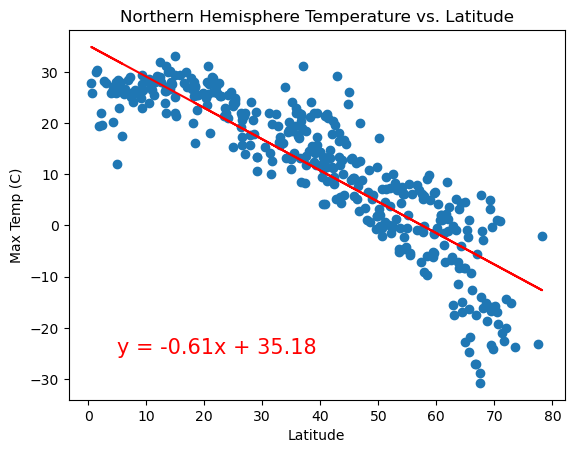

In [15]:
# Linear regression on Northern Hemisphere
northern_hemi_chart=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Northern Hemisphere Temperature vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.6363696647173263


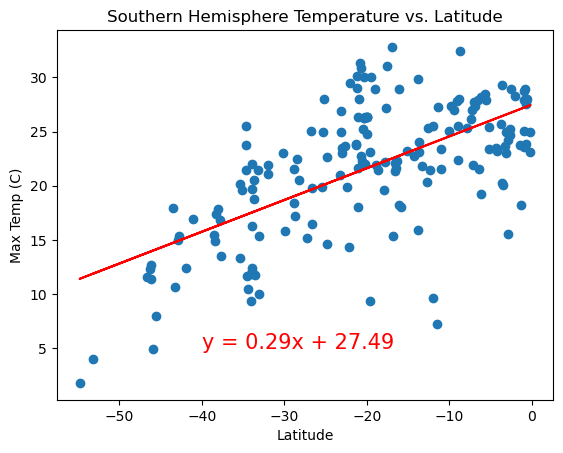

In [16]:
# Linear regression on Southern Hemisphere
southern_hemi_chart=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Southern Hemisphere Temperature vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a stong linear relationsip between latitiude and temperature. The max temperatures for a city decrease as the distance from the equator increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1966819369135185


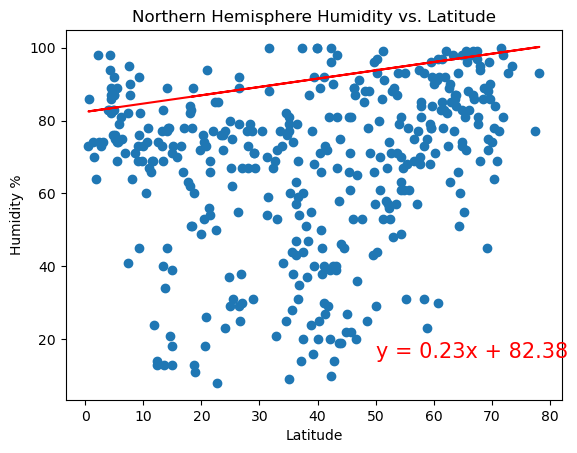

In [18]:
# Northern Hemisphere
northern_hemi_chart=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere Humidity vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.1966819369135185


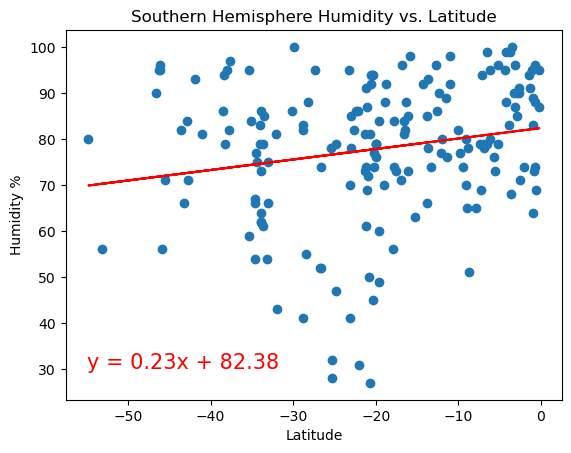

In [21]:
# Southern Hemisphere
southern_hemi_chart=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere Humidity vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is not much of a linear relationship between humidity and latitude. The distance from the equator does not have a direct impact on humidity percentage.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18328416910854506


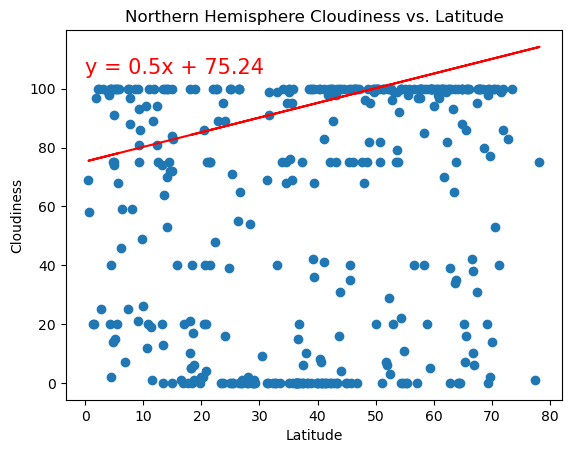

In [23]:
# Northern Hemisphere
northern_hemi_chart=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,105),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.18328416910854506


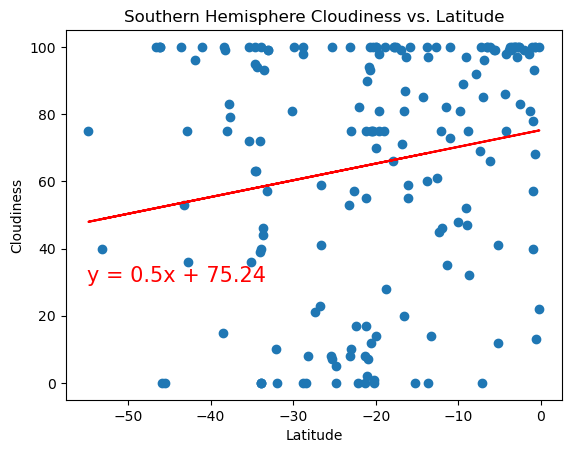

In [24]:
# Southern Hemisphere
southern_hemi_chart=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a weak correaltion in cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.3742471601468961


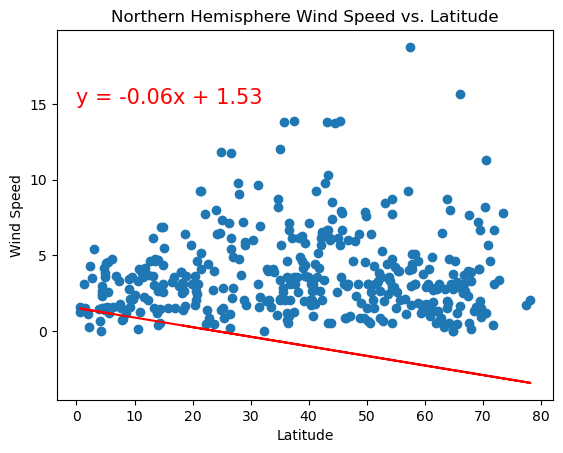

In [28]:
# Northern Hemisphere
northern_hemi_chart=plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3742471601468961


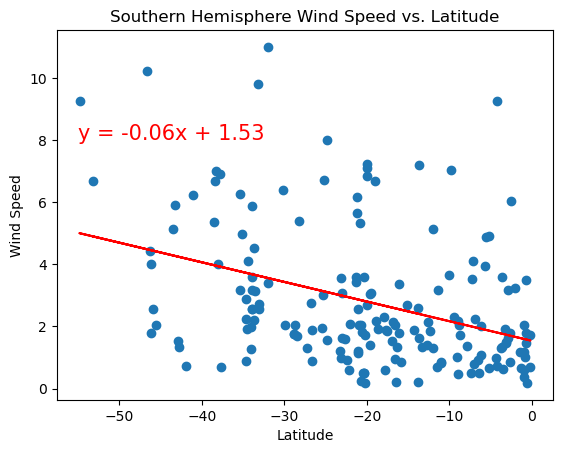

In [27]:
# Southern Hemisphere
southern_hemi_chart=plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**There is a weak correaltion in wind speed and latitude.